# <font color='mediumblue' face='times new roman' size='6'>Using EM Algorithm for fitting a Gaussian Mixture Model to the 'Old Faithful Geyser' Dataset</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# <font color='black' face='times new roman' size='5'>Loading 'Old Faithful Geyser' Dataset</font>

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/gchoi/Dataset/master/OldFaithful.csv')
data = df[['TimeEruption', 'TimeWaiting']].values

# <font color='orangered' face='times new roman' size='5'>Expectation-Maximization Algorithm</font>

In [31]:

def E_step(pi,X,mean,cov):
      # Compute the responsibilities (gamma) for each data poi nt and each component
    responsibilities = np.zeros((len(X), len(pi)))
    for i in range(len(X)):
        for k in range(len(pi)):
          responsibilities[i,k] = pi[k] * multivariate_normal(mean[k],cov[k]).pdf(X[i])
    responsibilities /= responsibilities.sum(axis=1)[:, np.newaxis]
    return responsibilities


def M_step(responsibilities, X):
    # Compute N_k: total responsibility assigned to each component
    N_k = responsibilities.sum(axis=0)

    # Update mixing coefficients (Pi)
    Pi = N_k / len(X)

    # Update means (mu_k)
    mean = np.dot(responsibilities.T, X) / N_k[:, np.newaxis]

    # Update covariance matrices (Sigma_k)
    # cov = np.zeros((X.shape[1], X.shape[1], len(N_k)))
    # for k in range(len(N_k)):
    #     diff = X - mean[k]
    #     cov[:, :, k] = np.dot((diff * responsibilities[:, k][:, np.newaxis]).T, diff) / N_k[k]
    #     print("cov updated",cov)

    return Pi, mean, cov

# <font color='darkred' face='times new roman' size='5'>Initialization Step</font>

In [32]:
K = 2
iter = 10
# Randomly initialize mean, covariance, and responsibilities
mean = np.array([[1.0, 70], [5.0, 50]])
cov = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]]])   # Assuming identity matrix
Pi = np.ones(K) / K

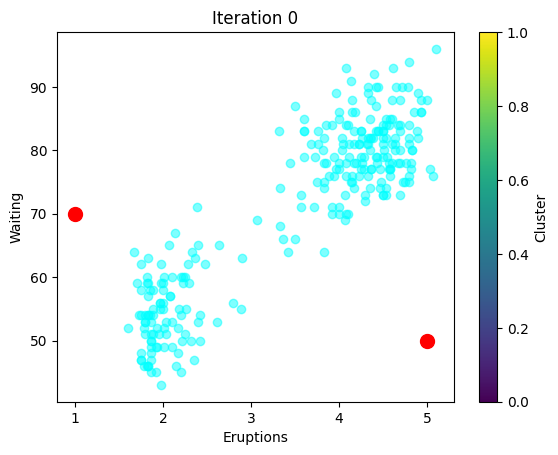

In [33]:
# Iteration 0
plt.scatter(data[:, 0], data[:, 1], c = 'cyan', alpha=0.5)
plt.scatter(mean[:, 0], mean[:, 1], marker='o', c='r', s=100)  # Mark centroids
plt.xlabel('Eruptions')
plt.ylabel('Waiting')
plt.title(f'Iteration {0}')
plt.colorbar(label='Cluster')
plt.show()

# <font color='orangered' face='times new roman' size='5'>Demonstrating iterative process of EM algorithm for fitting a GMM to the given dataset</font>

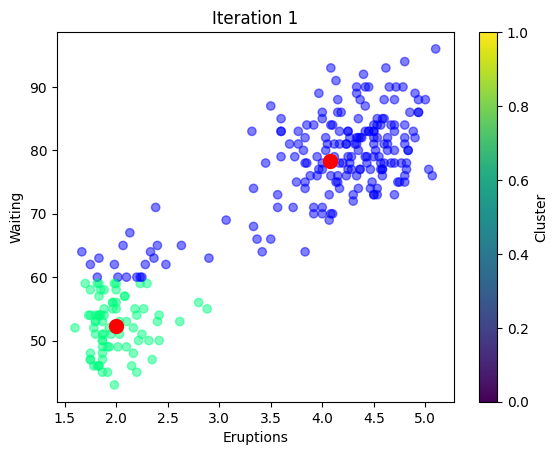

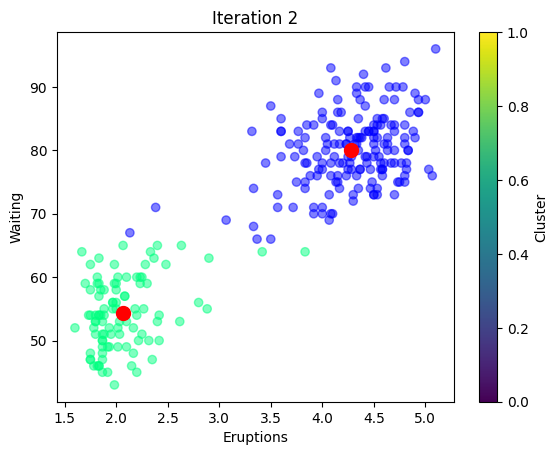

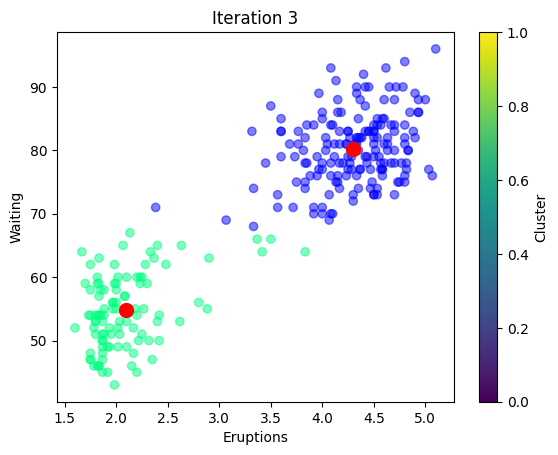

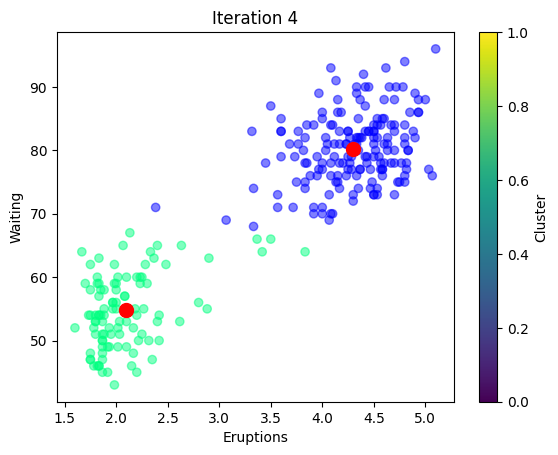

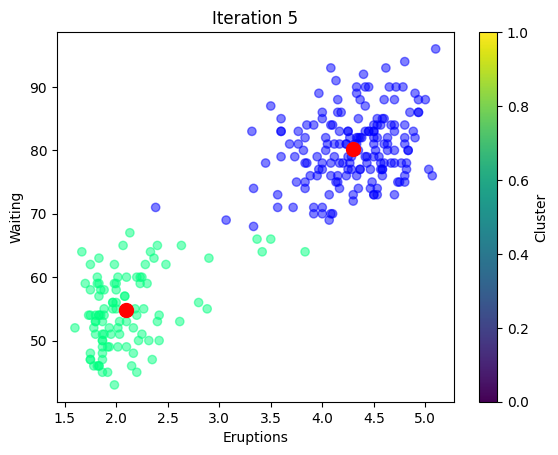

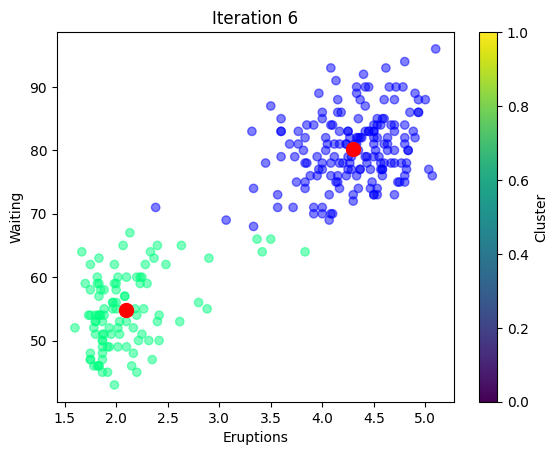

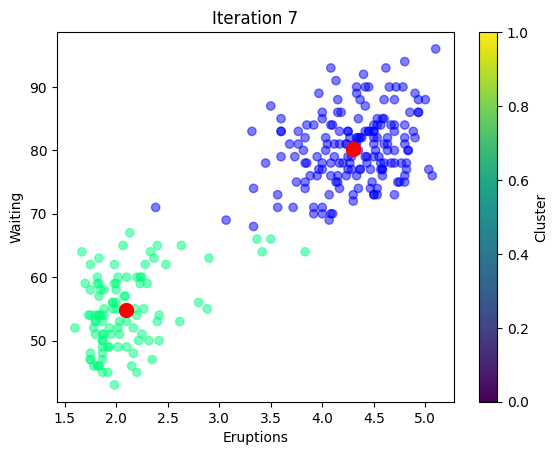

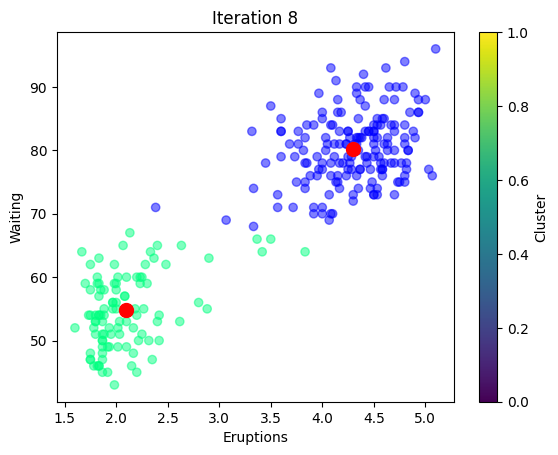

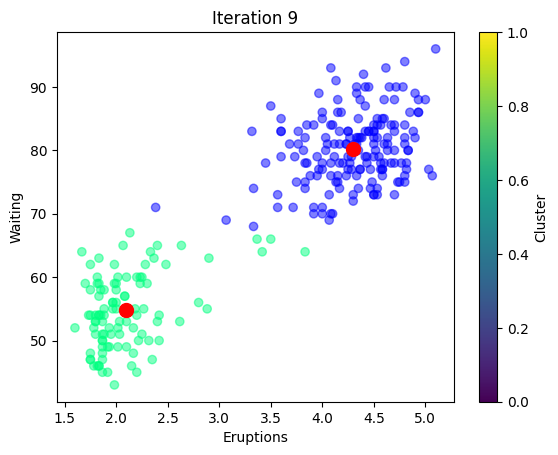

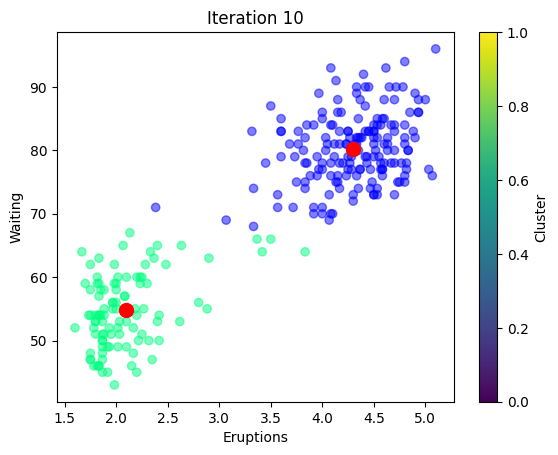

<Figure size 640x480 with 0 Axes>

In [34]:
#Iterations 1 to 10
for i in range(iter):
    # Expectation step
    responsibilities = E_step(Pi, data, mean, cov)

    # Maximization step
    Pi, mean, cov = M_step(responsibilities, data)

    # Assign labels to every point depending on the responsibilities
    labels = np.argmax(responsibilities, axis=1)

    # Plot data points and centroids
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='winter', alpha=0.5)
    plt.scatter(mean[:, 0], mean[:, 1], marker='o', c='r', s=100)  # Mark centroids
    plt.xlabel('Eruptions')
    plt.ylabel('Waiting')
    plt.title(f'Iteration {i + 1}')
    plt.colorbar(label='Cluster')
    plt.show()
    
plt.tight_layout()
plt.show()


# <font color='red' face='times new roman' size='5'>The above plots provides insights into how the algorithm converges to cluster the data points based on the underlying Gaussian distributions.</font>